# Henon map phase space

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sussix


#=========================
# Henon map
#=========================

def henon(x,px,Q,n_turns):
    z_vec = np.nan*np.ones(n_turns) + 1j*np.nan*np.ones(n_turns)
    z_vec[0] = x - 1j*px
    for ii in range(n_turns-1):
        _z = z_vec[ii]
        

        z_vec[ii+1] =  np.exp(2*np.pi*1j* Q ) * (_z-1j/4 * (_z + np.conjugate(_z))**2)
    return np.real(z_vec),-np.imag(z_vec)

#==========================

In [9]:
np.array([0.1,0.2,0.3,0.4,0.41,0.45,0.51,0.555])[[0,2,6]]

array([0.1 , 0.3 , 0.51])

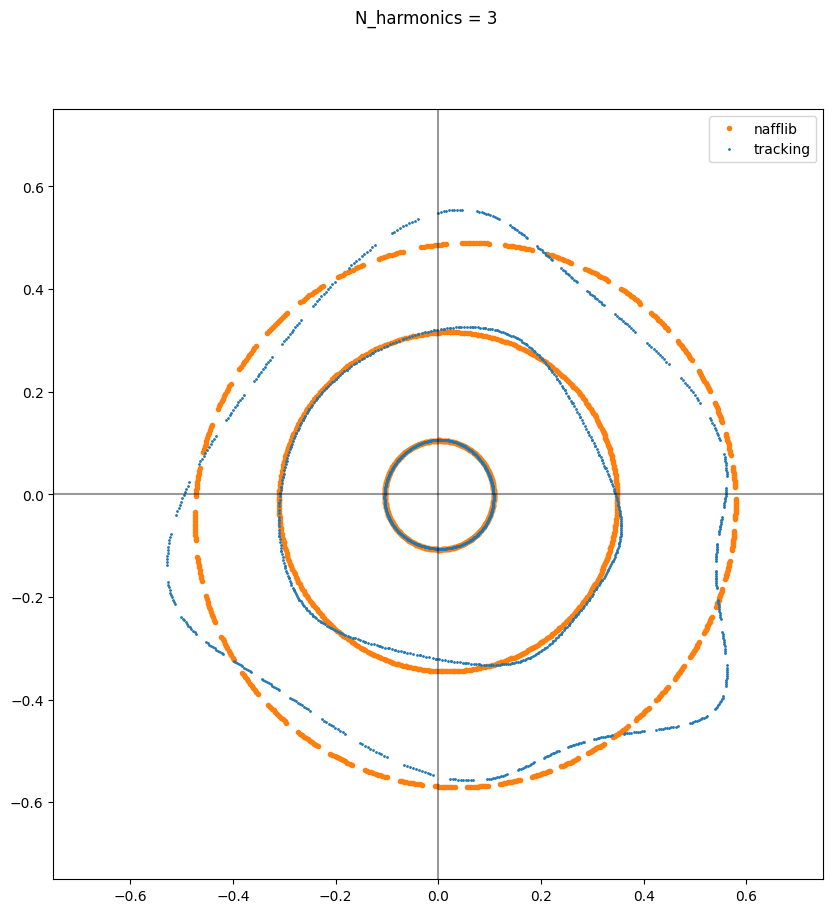

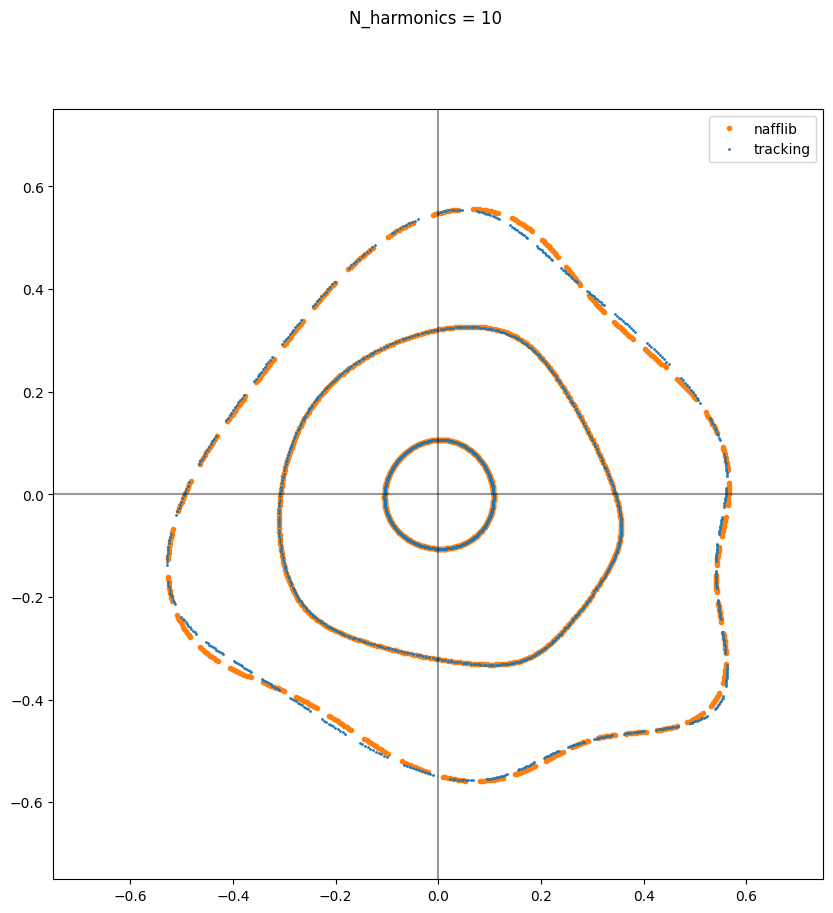

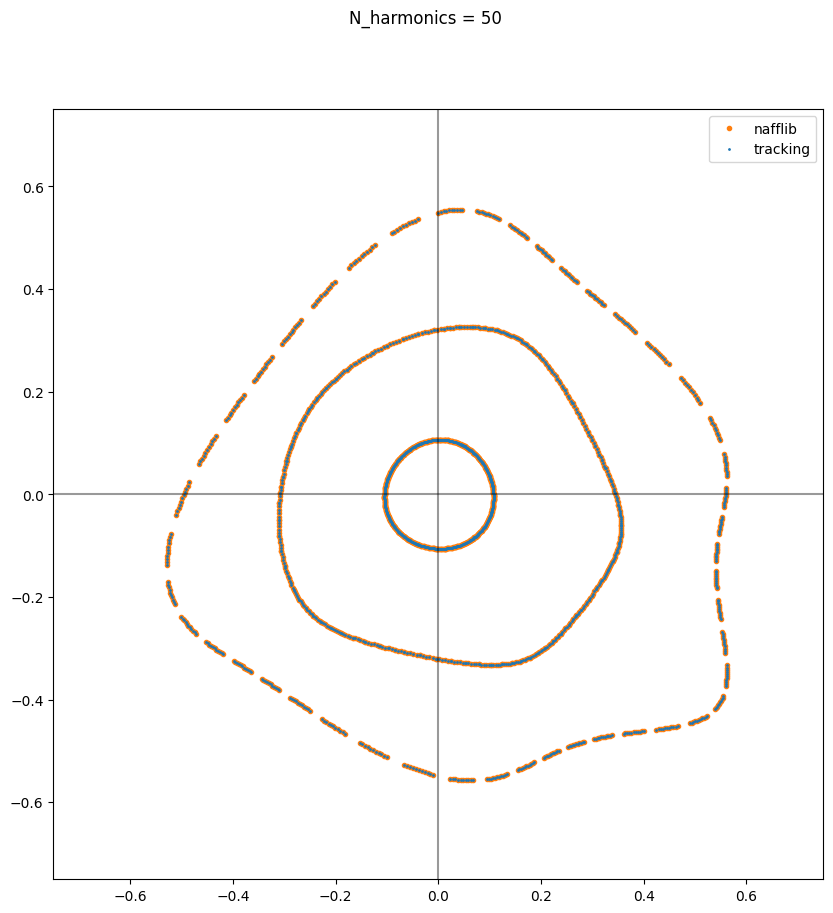

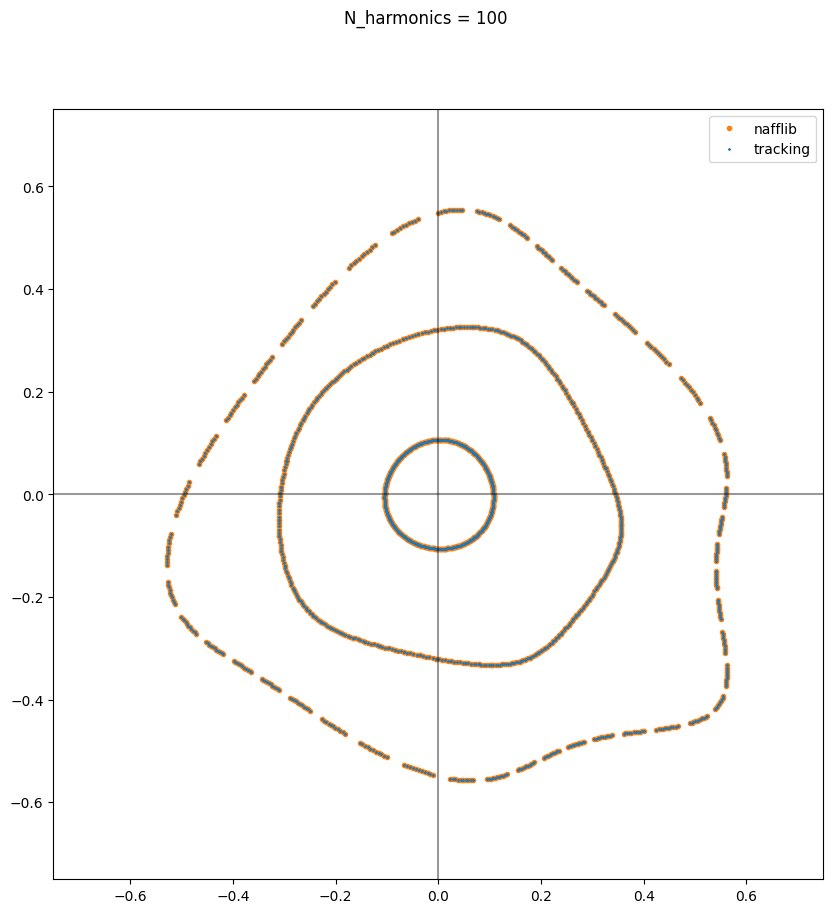

In [8]:
Q_h   = 0.2064898024701758
turns = int(1e4)
N     = np.arange(0,turns)

x_points = np.array([0.1,0.2,0.3,0.4,0.41,0.45,0.51,0.555])[[0,2,6]]
px_points = 0.35*x_points

for n_harm in [3,10,50,100]:
    plt.figure(figsize=(10,10))
    plt.suptitle('N_harmonics = {}'.format(n_harm))
    for part_x,part_px in zip(x_points,px_points):
        x,px =  henon(part_x,part_px,Q_h,turns)
        results = sussix.harmonics( x ,px,num_harmonics = n_harm,window_order=4,to_pandas=True)
        A,Q         = results.amplitude,results.frequency
        x_r,px_r    = sussix.generate_signal(  results.amplitude,
                                                        results.frequency,
                                                        N)


        show_turn = 500

        plt.plot(x_r[:show_turn],px_r[:show_turn],'.',color='C1')
        plt.plot(x[:show_turn],px[:show_turn],'.',color='C0',ms=2)


    plt.plot(np.nan,np.nan,'.',color='C1',label='nafflib')
    plt.plot(np.nan,np.nan,'.',color='C0',ms=2,label='tracking')

    plt.axhline(0,color='k',alpha=0.4)
    plt.axvline(0,color='k',alpha=0.4)
    plt.axis('square');
    plt.xlim([-0.75,0.75])
    plt.ylim([-0.75,0.75])
    plt.legend()

---
# Veryfing that the frequencies are indeed all harmonics of tune
---

In [4]:
# Tracking
#----------
part_idx = 6
n_harm   = 10
x,px =  henon(x_points[part_idx],px_points[part_idx],Q_h,turns)
#----------

fundamental_tunes = [sussix.tune(x,px,window_order=2)]
spectrum      = sussix.harmonics(x,px,num_harmonics = n_harm,window_order=2,to_pandas=True)
combinations  = sussix.find_linear_combinations(spectrum.frequency,fundamental_tunes = fundamental_tunes,max_harmonic_order=10,to_pandas=True)
display(combinations)

,resonance,err,freq
0,"(1, 0)",0.000000e+00,1.956222e-01
1,"(0, 0)",1.436593e-17,-1.436593e-17
2,"(2, 0)",2.775558e-16,3.912445e-01
3,"(-2, 0)",2.775558e-16,-3.912445e-01
4,"(6, -1)",1.332268e-15,1.737334e-01
5,"(-1, 0)",1.110223e-16,-1.956222e-01
6,"(-3, 1)",1.665335e-16,4.131333e-01
7,"(-4, 1)",1.026956e-15,2.175110e-01
8,"(3, -1)",1.665335e-16,-4.131333e-01
9,"(-5, 1)",4.926615e-16,2.188879e-02
